In [1]:
import pandas as pds 
import subprocess
import json
import matplotlib.pyplot as plt
import numpy as np

def get_experiments_from_path(start_path):
    experiment_dot_json_paths = subprocess.getoutput('find {} | grep experiment.json'.format(start_path))

    experiment_dot_json_paths = experiment_dot_json_paths.split('\n')
    experiments = []
    for p in experiment_dot_json_paths:
        with open(p) as f:
            experiments.append(json.load(f))
    
    return experiments

# CORES Dataset, CNN, One source Domain

In [2]:
cores_cnn_3_raw = get_experiments_from_path("../cores_cnn_3")

print("parameters", cores_cnn_3_raw[0]["parameters"].keys())
print("results", cores_cnn_3_raw[0]["results"].keys())

parameters dict_keys(['experiment_name', 'lr', 'device', 'seed', 'dataset_seed', 'desired_classes', 'batch_size', 'n_epoch', 'patience', 'criteria_for_best', 'normalize_source', 'normalize_target', 'x_net', 'NUM_LOGS_PER_EPOCH', 'RESULTS_DIR', 'EXPERIMENT_JSON_PATH', 'LOSS_CURVE_PATH', 'BEST_MODEL_PATH', 'num_examples_per_class_per_domain', 'source_domains', 'target_domains'])
results dict_keys(['source_test_label_accuracy', 'source_test_label_loss', 'target_test_label_accuracy', 'target_test_label_loss', 'source_val_label_accuracy', 'source_val_label_loss', 'target_val_label_accuracy', 'target_val_label_loss', 'total_epochs_trained', 'total_experiment_time_secs', 'confusion', 'per_domain_accuracy'])


In [6]:
cores_cnn_3_processed = []

for e in cores_cnn_3_raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    cores_cnn_3_processed.append(p)

df = pds.DataFrame(cores_cnn_3_processed)

In [4]:
df = df.groupby("source_domains").mean()
df

,2,5,3,4,1
source_domains,,,,,
[1],0.490848,0.425319,0.463626,0.437788,0.983678
[2],0.983678,0.707782,0.847953,0.760138,0.484152
[3],0.809825,0.743786,0.977241,0.739862,0.491071
[4],0.788772,0.698955,0.729032,0.972874,0.442411
[5],0.714152,0.984828,0.737558,0.691754,0.446429


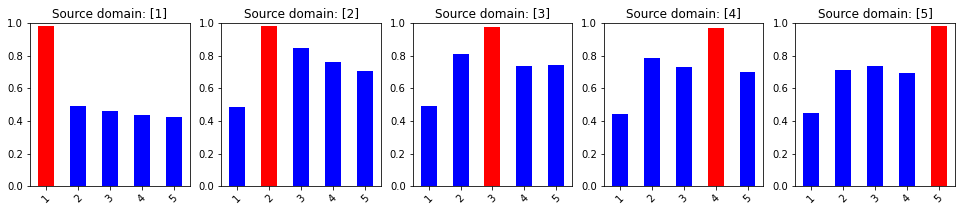

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 3]

domain_colors = {True: 'r', False: 'b'}
for i, (name, row) in enumerate(df.iterrows()):
    row = row.sort_index()
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)

# CORES, PTN, One source domain

In [9]:
raw = get_experiments_from_path("../cores_ptn_1")
processed = []

for e in raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    processed.append(p)

df = pds.DataFrame(processed)
df

,experiment_name,source_domains,5,1,2,4,3
0,cores_ptn_1,[5],0.931034,0.935345,0.965517,0.866379,NaN
1,cores_ptn_1,[5],0.995690,0.965517,0.956897,0.943966,NaN
2,cores_ptn_1,[2],0.905172,0.887931,0.974138,NaN,0.948276
3,cores_ptn_1,[1],0.939655,0.987069,0.909483,NaN,0.896552
4,cores_ptn_1,[2],0.961207,0.909483,0.978448,NaN,0.974138
5,cores_ptn_1,[1],0.896552,0.982759,0.892241,NaN,0.948276
6,cores_ptn_1,[4],0.982759,0.974138,1.000000,0.995690,NaN
7,cores_ptn_1,[3],0.965517,0.948276,0.978448,NaN,0.995690
8,cores_ptn_1,[1],0.956897,0.987069,0.961207,NaN,0.931034
9,cores_ptn_1,[3],0.926724,0.892241,0.948276,NaN,0.965517


In [10]:
df = df.groupby("source_domains").mean()
df

,5,1,2,4,3
source_domains,,,,,
[1],0.927586,0.986207,0.914655,NaN,0.923276
[2],0.933621,0.899138,0.968966,NaN,0.957759
[3],0.951724,0.932759,0.963793,NaN,0.986207
[4],0.981034,0.968966,0.979310,0.986207,NaN
[5],0.977586,0.956897,0.969828,0.922414,NaN


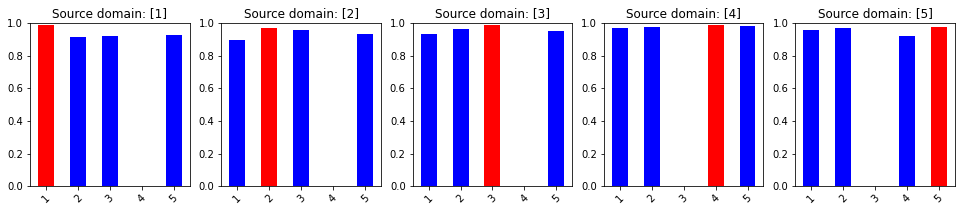

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 3]

domain_colors = {True: 'r', False: 'b'}
for i, (name, row) in enumerate(df.iterrows()):
    row = row.sort_index()
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)